In [102]:

import pandas as pd
import plotnine as pn
import torch
import sys
sys.path.append("/Users/nathanielimel/uci/projects/ibsg")
from misc.util import encoders_to_df

In [103]:
# encoders = pd.read_csv("/Users/nathanielimel/uci/projects/ibsg/outputs/states=10/signals=10/prior=-8/dist=squared_dist/meaning_certainty=0/dynamics=two_population_rd/population_size=None/num_trials=8/seed=42/discr_need=1/final_encoders.csv")
# encoders

In [104]:
# Load tensor and convert to df
encoder_tensors = torch.load("/Users/nathanielimel/uci/projects/ibsg/outputs/states=10/signals=10/prior=-8/dist=squared_dist/meaning_certainty=0/dynamics=two_population_rd/population_size=None/num_trials=8/seed=42/discr_need=1/final_encoders.pt")
encoders = encoders_to_df(encoder_tensors)

In [105]:
torch.set_printoptions(sci_mode=False)
# encoder_tensors[3].sum(dim=-1)
sad = False
for i, t in enumerate(encoder_tensors):
    if not torch.allclose(t.sum(dim=-1), torch.ones_like(t.sum(dim=-1))):
        print(i)
        print(t)
        sad = True
if sad:
    raise Exception

In [106]:
# encoders[encoders["trial" == i] for i in encoders["trial"].values]

def numeric_col_to_categorical(df: pd.DataFrame, col: str) -> pd.DataFrame:
    """Change a float valued column (e.g. trial or round) to Categorical for visualization."""
    # adjust values to Categorical where appropriate
    df[col] = df[col].astype(int).astype(str)
    df = df.assign(**{col: pd.Categorical(df[col])})
    return df


trials = encoders["trial"].unique()
encoders["trial"] = (encoders["trial"] + 1).astype(int)
encoders = numeric_col_to_categorical(encoders, "meanings")
encoders = numeric_col_to_categorical(encoders, "words")
# encoders = numeric_col_to_categorical(encoders, "trial")


def get_plot(df):
    return pn.ggplot(df, pn.aes(x="words", y="meanings", fill="p(w|m)")) + pn.geom_tile() + pn.ggtitle("trial n")



for trial in trials:
    df = encoders[encoders["trial"] == trial + 1]
    # print(df)
    # df = numeric_col_to_categorical(df, "trial")
    print(trial + 1)
    print(get_plot(df))

1.0


AttributeError: 'Text' object has no property 'value'

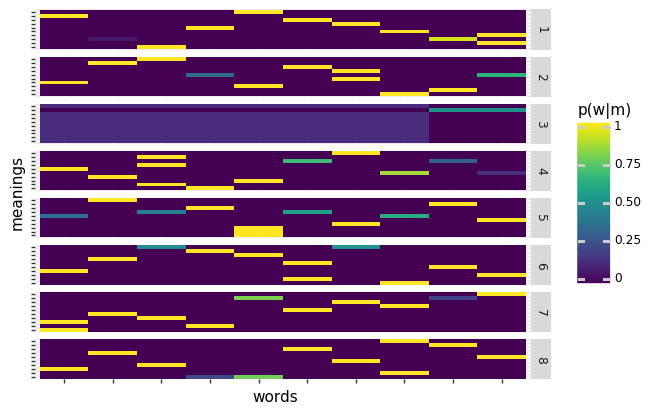

<ggplot: (374850284)>

In [ ]:
# use facet grid

encoders["naming \n probability\n"] = encoders["p(w|m)"]

(
    pn.ggplot(encoders, pn.aes(x="words", y="meanings", fill="p(w|m)"))
    + pn.geom_tile()
    + pn.facet_grid("trial ~ .")
    + pn.theme(
        axis_text_y=pn.element_blank(),
        axis_text_x=pn.element_blank(),
    )
        # pn.axis.ticks.x=element_blank())    
)

In [ ]:
(
    pn.ggplot(encoders, pn.aes(x="words", y="meanings", fill="p(w|m)"))
    + pn.geom_tile()
    + pn.facet_grid("trial ~ .")
    + pn.theme(
        axis_text_y=pn.element_blank(),
        axis_text_x=pn.element_blank(),
    )
        # pn.axis.ticks.x=element_blank())    
).save("encoders.png")

/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: encoders.png
